In [1]:
from sklearn.svm import SVC

SVC(
    C=1.0,                          # 正则化参数（惩罚系数），越小越宽松
    kernel='rbf',                   # 核函数：{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
    degree=3,                       # 多项式核的阶数（仅用于 'poly' 核）
    gamma='scale',                  # 核系数：{'scale', 'auto'} 或浮点数
    coef0=0.0,                      # 核函数中的独立项（影响 'poly' 和 'sigmoid'）
    shrinking=True,                 # 是否使用启发式收缩
    probability=False,              # 是否启用概率估计（会降低效率）
    tol=0.001,                      # 停止迭代的容差
    cache_size=200,                 # 核缓存大小（MB）
    class_weight=None,              # 类别权重：{dict, 'balanced'} 或 None
    verbose=False,                  # 是否启用详细输出
    max_iter=-1,                    # 最大迭代次数（-1表示无限制）
    decision_function_shape='ovr',  # 多分类策略：{'ovr', 'ovo'}
    break_ties=False,               # 决策边界平局时是否返回置信度最高的类别
    random_state=None               # 随机种子（用于概率估计和数据洗牌）
)

SVC()

## 参数 kernel 的含义

在 SVC 中，参数 kernel 决定了支持向量机在处理非线性数据时如何将输入特征映射到更高维的空间，从而使数据变得线性可分。常见的核函数有：

1. linear：线性核，直接在原始特征空间中进行分类，适用于线性可分的数据。
  * 优点：计算效率高，适用于大规模数据集。
  * 缺点：无法处理非线性边界。
2. rbf（径向基函数）：默认选项，使用高斯函数将数据映射到无限维空间。
  * 优点：灵活性高，适用于各种非线性问题。
  * 缺点：需要调整参数 gamma，计算复杂度较高。
3. poly：多项式核，通过多项式函数进行映射。
  * 可调参数：degree（多项式阶数）和 coef0（常数项）。
4. sigmoid：使用 Sigmoid 函数（类似神经网络中的激活函数）进行映射。
  * 特点：对某些特定数据集有效，但不如 RBF 通用。
5. precomputed：使用预先计算的核矩阵进行训练，适用于自定义相似度度量的场景。

## 对比示例：不同核函数的效果

下面通过一个二维分类任务，对比不同核函数（linear、rbf、poly、sigmoid）的决策边界效果：  
1. 线性核：无法处理同心圆数据，准确率最低。
2. RBF 核：自动找到圆形边界，表现最佳。
3. 多项式核：通过 3 次多项式拟合出近似圆形边界。
4. Sigmoid 核：在此数据集上表现不佳，决策边界过于简单。

选择建议：
* 优先尝试 RBF 核（默认选项），特别是当数据分布未知时。
* 数据线性可分时，使用线性核（计算效率高）。
* 需要自定义相似度时，考虑 precomputed 核。
* 调整核函数的参数（如 RBF 的 gamma、多项式核的 degree）通常能进一步提升性能。

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# 生成非线性可分数据集（同心圆）
X, y = datasets.make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# 定义不同的核函数
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
titles = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel', 'Sigmoid Kernel']

In [16]:
# 创建画布
plt.figure(figsize=(16, 4))

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

In [17]:
# 网格用于绘制决策边界
h = .02  # 网格步长
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

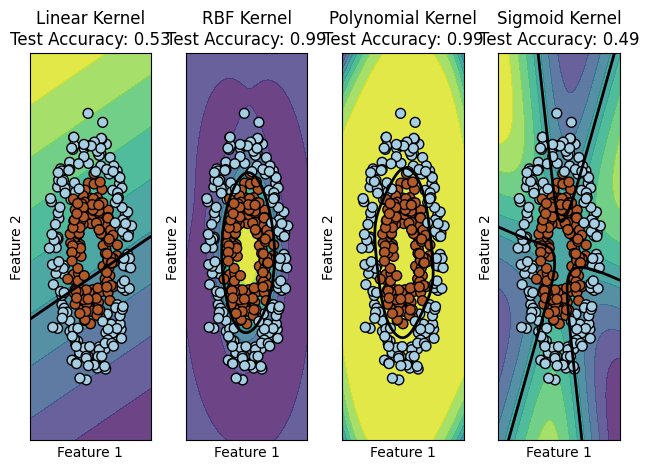

In [18]:
for i, (kernel, title) in enumerate(zip(kernels, titles)):
    # 训练 SVC 模型（使用默认参数）
    clf = SVC(kernel=kernel, gamma='scale')
    if kernel == 'poly':
        clf = SVC(kernel=kernel, degree=8, gamma='scale')  # 多项式核设置阶数为3
    
    clf.fit(X_train_scaled, y_train)
    
    # 计算测试集准确率
    accuracy = clf.score(X_test_scaled, y_test)
    
    # 绘制决策边界
    plt.subplot(1, 4, i + 1)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制等高线（决策边界）
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(Z.min(), Z.max(), 10))
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    
    # 绘制训练数据点
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
                edgecolors='k', s=50, cmap=plt.cm.Paired)
    
    plt.title(f'{title}\nTest Accuracy: {accuracy:.2f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()    